# Data Mining 1 – Assignment 1  
##### Student ID: 20115725  
##### Name: Berkay Eren  
##### Lecturer: Dr Bernard Butler  
##### Submission Date: 26 October 2025  

## 🎯 Objective – Pass 2: Feature Exploration  
The aim of Pass 2 is to **examine each feature’s distribution** and its **relationship with other variables**, especially the target variable (`tgt`).

The goal is to: 
1. Explore **individual feature distributions** (numeric & categorical).  
2. Identify **skewness, outliers, and balance**.  
3. Examine **relationships between features** (within and across groups).  
4. Evaluate **feature relevance** for predicting re-offending (`tgt`).  


### Importing Libraries and Loading the Data

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

sns.set(style="whitegrid")

# reload cleaned dataset
df = pd.read_csv("data/cleaned_arrests.csv")

# re-convert categorical types
cat_cols = df.select_dtypes(include='object').columns.tolist()
df[cat_cols] = df[cat_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60458 entries, 0 to 60457
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   tgt            60458 non-null  category
 1   a1             60458 non-null  float64 
 2   a2             60458 non-null  category
 3   a3             46485 non-null  category
 4   a4             60458 non-null  category
 5   b              60458 non-null  category
 6   c1             50676 non-null  category
 7   c2             35649 non-null  category
 8   c3             60458 non-null  category
 9   d1             60458 non-null  float64 
 10  d2             60458 non-null  float64 
 11  d3             9433 non-null   category
 12  d4             22713 non-null  category
 13  d5             60458 non-null  category
 14  e1             3142 non-null   category
 15  e2             7335 non-null   category
 16  f1             60458 non-null  category
 17  f2             58007 non-null  

### Numeric Feature Exploration (`a1`, `d1`, `d2`)  

,count,mean,std,min,25%,50%,75%,max
a1,60458.0,6.732777,5.263934,0.38,3.48,5.86,8.54,62.34
d1,60458.0,6.579396,3.367502,0.00,4.64,5.95,7.74,33.92
d2,60458.0,12.144479,10.026438,0.00,5.21,10.18,16.57,103.91


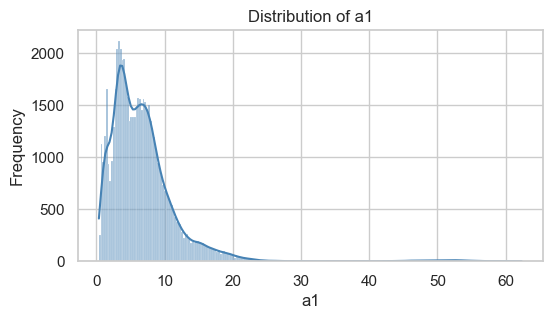

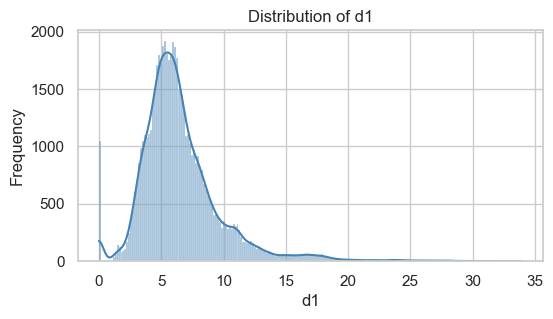

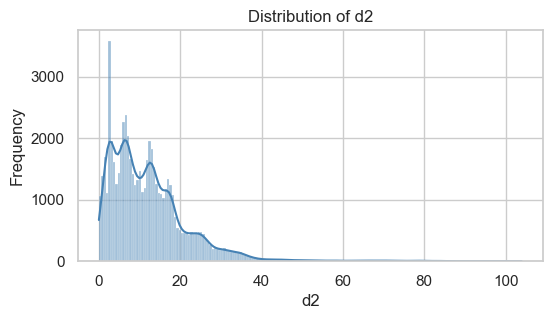

In [60]:
numeric_cols = df.select_dtypes(include=['float64']).columns.tolist()
display(df[numeric_cols].describe().T)

for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### Observing Numeric Distributions 

The histograms above display the frequency distributions for the three numeric features.

- **a1:** Highly right-skewed with several extreme values above 30. Most observations fall between 0 and 10, indicating a long positive tail.  
- **d1:** Slightly right-skewed but more concentrated. The majority of values lie between 4 and 8, forming a clear peak around 5.  
- **d2:** Strongly right-skewed with multiple smaller peaks, suggesting more irregular variation. A few records exceed 60–80, creating visible outliers.

Overall, all numeric features show **non-normal, positively skewed** shapes with a few **high-value outliers**.  
These distributions suggest that median-based or log-transformed statistics may be more stable for later analysis.


In [61]:
df[numeric_cols].agg(['mean','median','std','skew','kurtosis']).T.round(2)

,mean,median,std,skew,kurtosis
a1,6.73,5.86,5.26,3.82,27.09
d1,6.58,5.95,3.37,2.02,7.70
d2,12.14,10.18,10.03,2.16,8.74


All three numeric variables are **positively skewed**, meaning their distributions are pulled to the right by higher-value observations.  
The very high **kurtosis** (especially for `a1`) indicates the presence of strong **outliers and heavy tails**. 

### Categorical Feature Exploration 

Grouped features are examined individually to identify internal patterns, balance, and variation across categories.

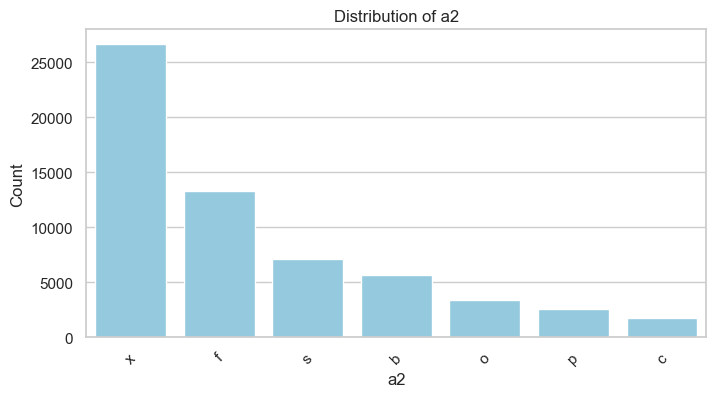

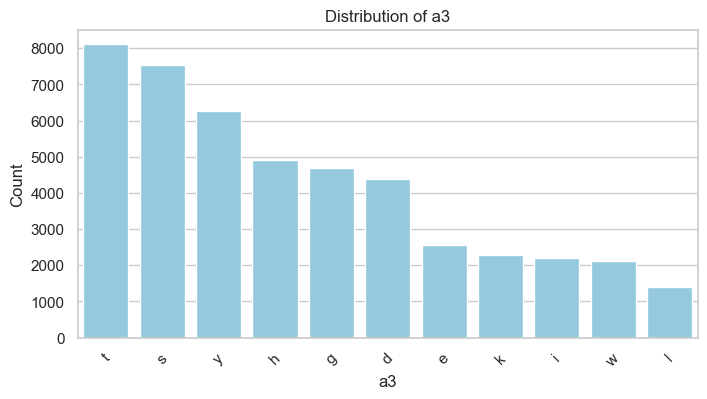

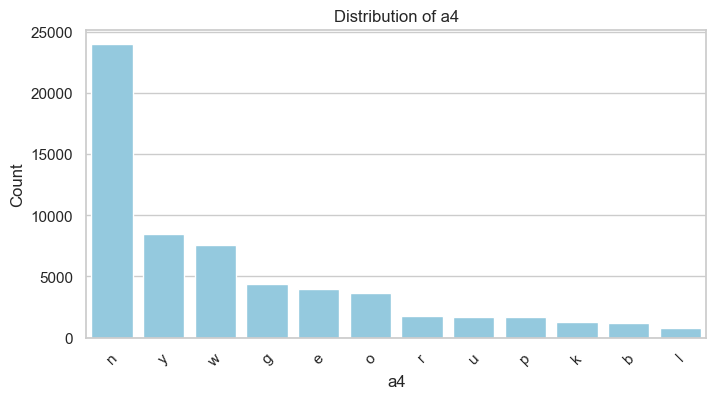

In [62]:
a_features = ['a2', 'a3', 'a4']

for col in a_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

,Missing Count,Missing (%)
a2,0,0.00
a3,13973,23.11
a4,0,0.00


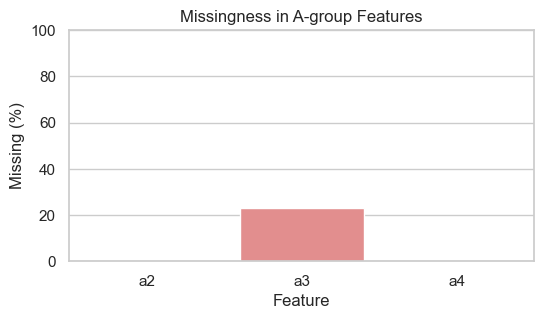

In [63]:
missing_counts = df[a_features].isna().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing (%)': missing_pct
})
display(missing_summary)

plt.figure(figsize=(6,3))
sns.barplot(x=missing_pct.index, y=missing_pct.values, color='lightcoral')
plt.title("Missingness in A-group Features")
plt.xlabel("Feature")
plt.ylabel("Missing (%)")
plt.ylim(0,100)
plt.show()

### A-group Features: `a2`, `a3`, and `a4`

The A-group variables represent related categorical characteristics.  
Their distributions show clear differences in balance and diversity:

- **a2:** Extremely imbalanced. The category `+` dominates with more than 25,000 records, followed by `t` and `s`.  
  This indicates one highly frequent level that may reduce the variable’s discriminative power.
- **a3:** More evenly distributed. Categories `t`, `s`, and `y` are the most common, but the gap between categories is smaller than in `a2`.  
  This makes `a3` potentially more informative for analysis.
- **a4:** Strongly dominated by category `n`, which represents nearly 40% of observations.  
  The remaining categories occur at much lower frequencies.

Overall, the **A-group shows strong internal variation**.  
While `a3` maintains moderate balance, `a2` and `a4` are heavily skewed toward a few values.  
Such imbalance may affect model training and may require encoding or grouping adjustments later in Pass 3.


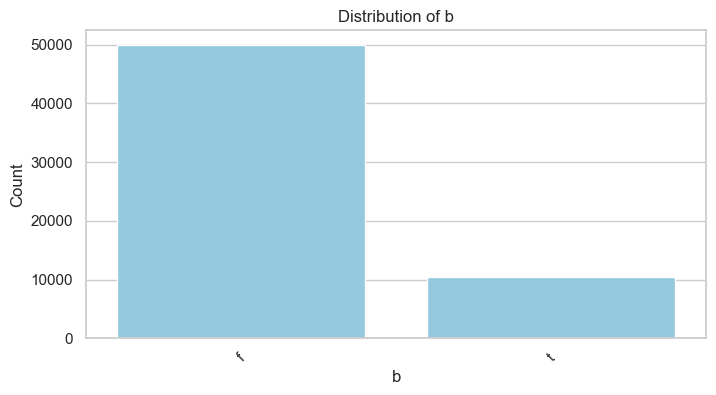

In [64]:
plt.figure(figsize=(8,4))
sns.countplot(x='b', data=df, order=df['b'].value_counts().index, color='skyblue')
plt.title("Distribution of b")
plt.xlabel("b")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


In [65]:
missing_count = df['b'].isna().sum()
missing_pct = (missing_count / len(df) * 100).round(2)

print(f"Feature b – Missing values: {missing_count}  ({missing_pct}%)")

Feature b – Missing values: 0  (0.0%)


### Feature `b`

Feature `b` contains only two categories, but they are highly unbalanced.  
One category accounts for almost 80 % of all observations, while the other represents only about 20 %.  
Such a strong imbalance means that `b` may have limited predictive variation on its own,  
yet it could still be useful in interaction with other variables if the minority category relates strongly to re-offending.


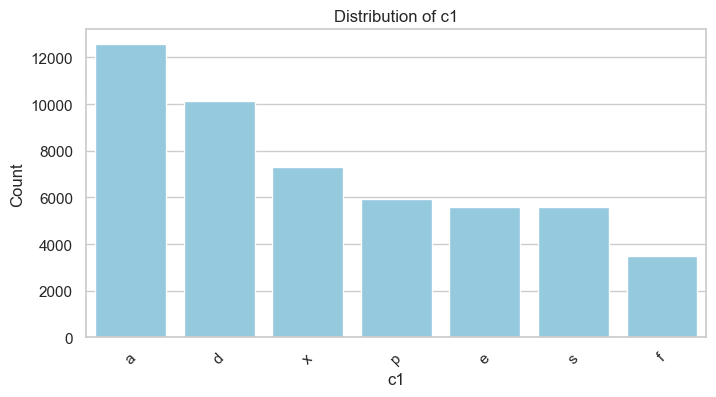

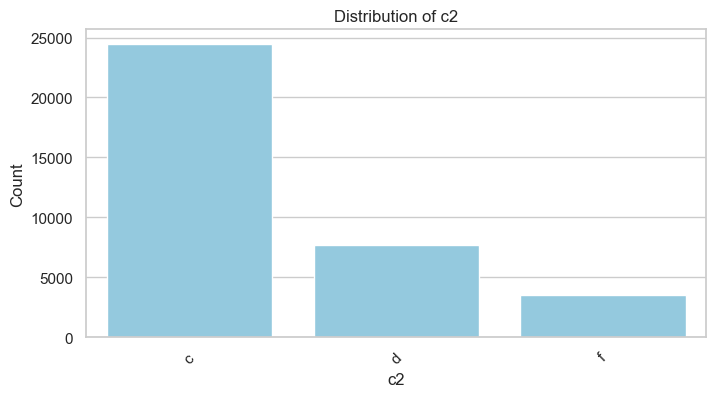

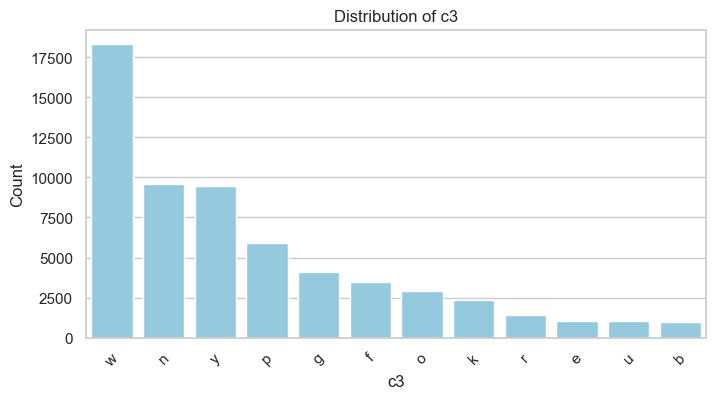

In [66]:
c_features = ['c1', 'c2', 'c3']

for col in c_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

,Missing Count,Missing (%)
c1,9782,16.18
c2,24809,41.04
c3,0,0.00


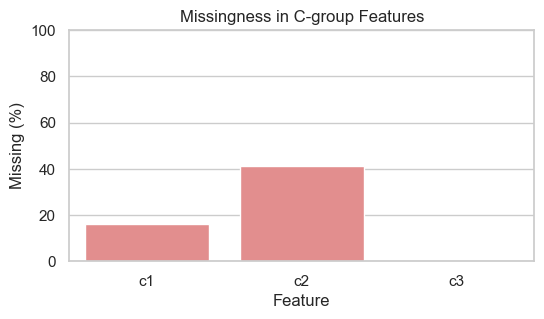

In [67]:
missing_counts = df[c_features].isna().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing (%)': missing_pct
})
display(missing_summary)

plt.figure(figsize=(6,3))
sns.barplot(x=missing_pct.index, y=missing_pct.values, color='lightcoral')
plt.title("Missingness in C-group Features")
plt.xlabel("Feature")
plt.ylabel("Missing (%)")
plt.ylim(0,100)
plt.show()

### C-group Features: `c1`, `c2`, and `c3`

The C-group variables show mixed balance and diversity:

- **c1:** Fairly well distributed with several active categories. The top three levels together cover about half of all observations, suggesting moderate variety but still some concentration.  
- **c2:** Very uneven, with one category (`c`) dominating most of the data and only two other levels appearing less often. This imbalance limits its independent predictive value.  
- **c3:** Contains many categories but is also top-heavy. The category `w` occurs almost twice as often as the next two (`n` and `y`), while the rest appear infrequently.

Overall, the C-group features capture more categorical diversity than the A-group,  
but `c2` in particular shows heavy dominance that could bias model learning.  
`c1` and `c3` remain more balanced and potentially more informative.


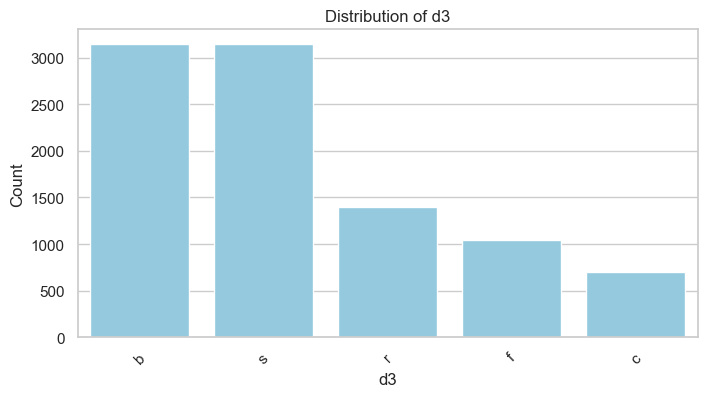

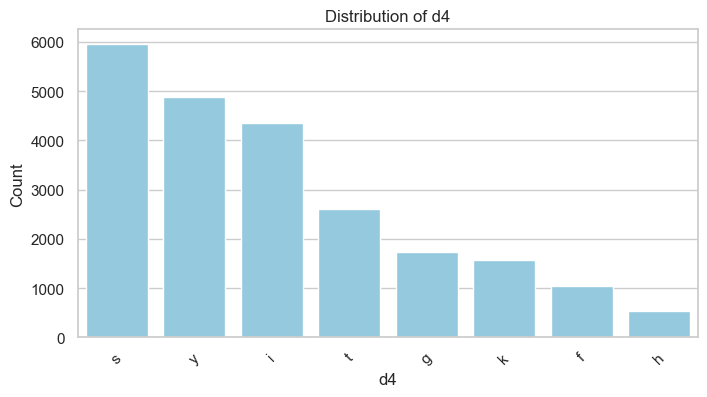

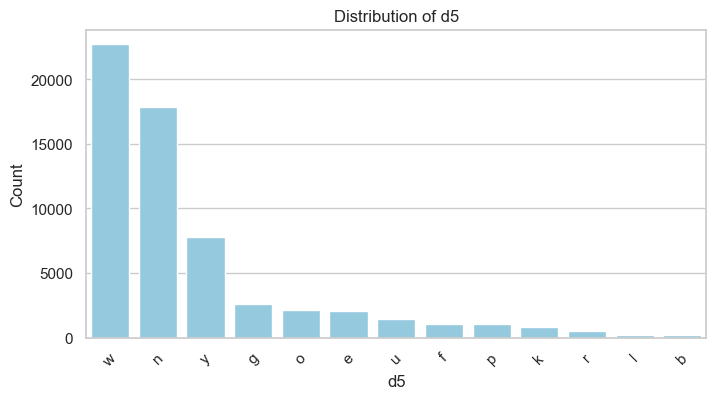

In [68]:
d_features = ['d3', 'd4', 'd5']

for col in d_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

,Missing Count,Missing (%)
d3,51025,84.40
d4,37745,62.43
d5,0,0.00


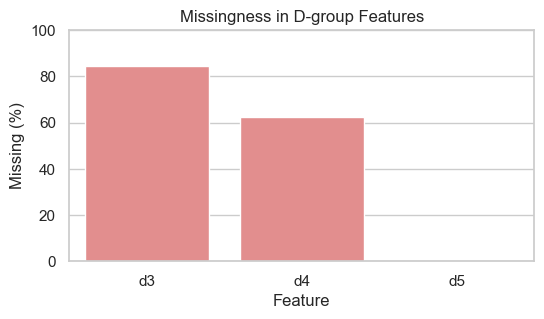

In [69]:
missing_counts = df[d_features].isna().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing (%)': missing_pct
})
display(missing_summary)

plt.figure(figsize=(6,3))
sns.barplot(x=missing_pct.index, y=missing_pct.values, color='lightcoral')
plt.title("Missingness in D-group Features")
plt.xlabel("Feature")
plt.ylabel("Missing (%)")
plt.ylim(0,100)
plt.show()

### D-group Features: `d3`, `d4`, and `d5`

The D-group features show clear differences in both completeness and distribution.

- **d3:** Includes a small set of categories with relatively similar counts among the top two (`s` and `d`).  
  However, more than 80 % of this column is missing, meaning the visible pattern is based on a limited subset of records.
- **d4:** Slightly more complete than `d3` but still missing around 60 % of its values.  
  The distribution is moderately varied, with categories `s`, `y`, and `i` forming the majority.
- **d5:** The most complete variable in the group. It has many categories, but one (`w`) is dominant, followed by `n` and `y`.  
  The remaining categories appear infrequently, showing a long tail pattern.

Overall, the **D-group** contains informative patterns but is strongly affected by missing data,  
especially in `d3` and `d4`. These variables may still carry useful signal, but their incompleteness  
will need to be addressed in **Pass 3** through either imputation or selective exclusion.


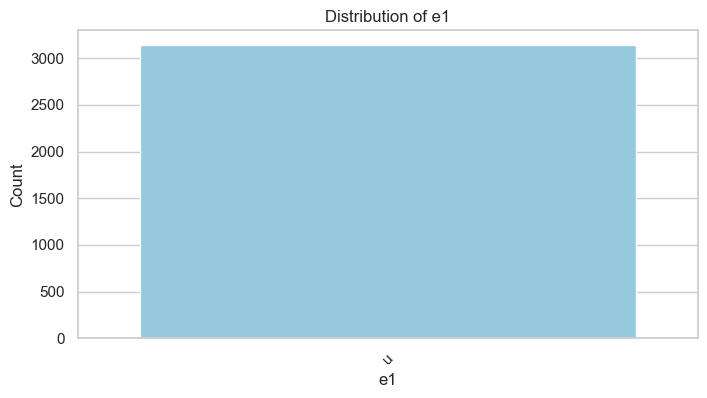

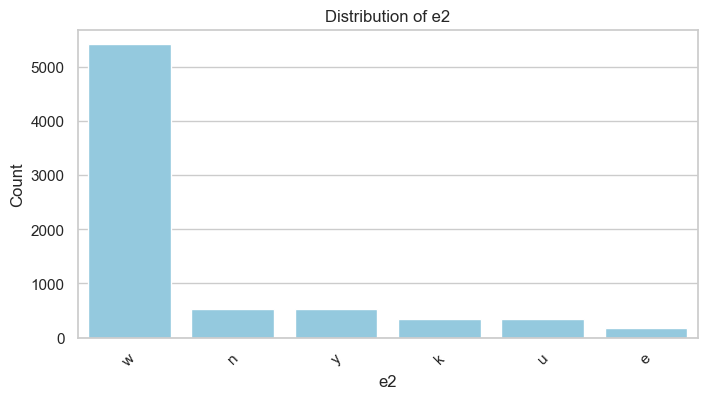

In [70]:
e_features = ['e1', 'e2']

for col in e_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

,Missing Count,Missing (%)
e1,57316,94.80
e2,53123,87.87


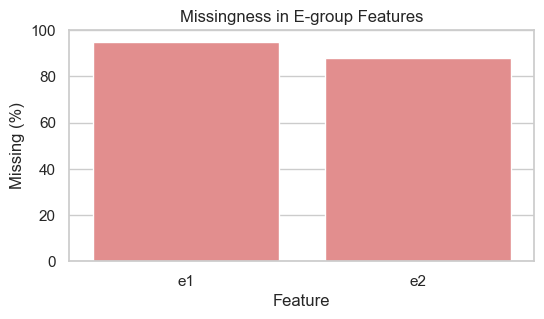

In [71]:
missing_counts = df[e_features].isna().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing (%)': missing_pct
})
display(missing_summary)

plt.figure(figsize=(6,3))
sns.barplot(x=missing_pct.index, y=missing_pct.values, color='lightcoral')
plt.title("Missingness in E-group Features")
plt.xlabel("Feature")
plt.ylabel("Missing (%)")
plt.ylim(0,100)
plt.show()

### E-group Features: `e1` and `e2`

Both features in the E-group contain very large amounts of missing data.  
Only a small portion of records have valid values, and their category variety is minimal.

- **e1:** Contains only a single visible category, suggesting extremely limited variation.  
  Around 85–90 % of its values are missing.  
- **e2:** Slightly more complete but still highly sparse. One category (`w`) dominates the few available entries,  
  while the rest occur rarely.

Due to this level of incompleteness, the E-group features are unlikely to add reliable information to the model.  
They will remain in the dataset for now but are candidates for removal in Pass 3.


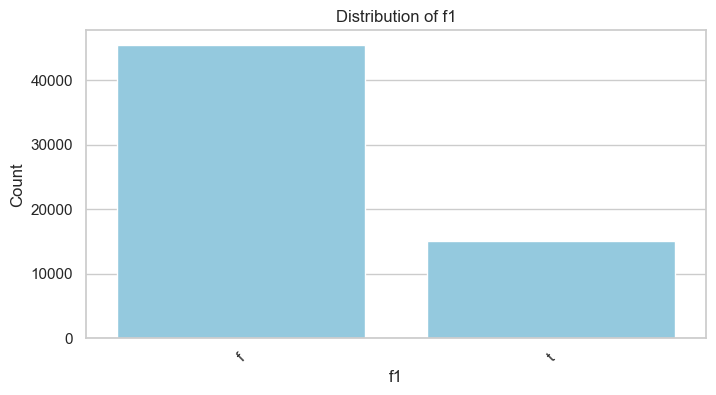

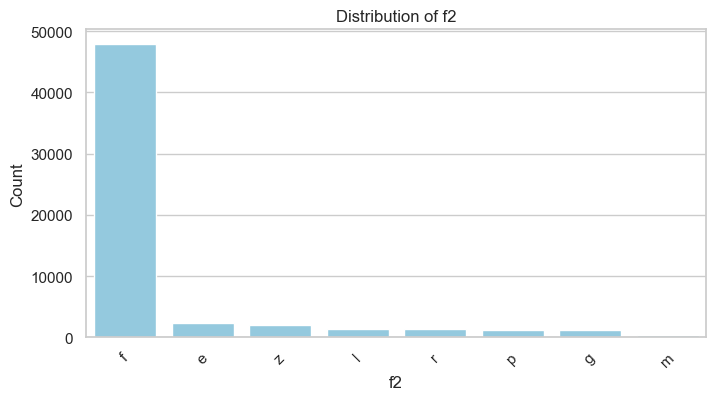

In [72]:
f_features = ['f1', 'f2']

for col in f_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

,Missing Count,Missing (%)
f1,0,0.00
f2,2451,4.05


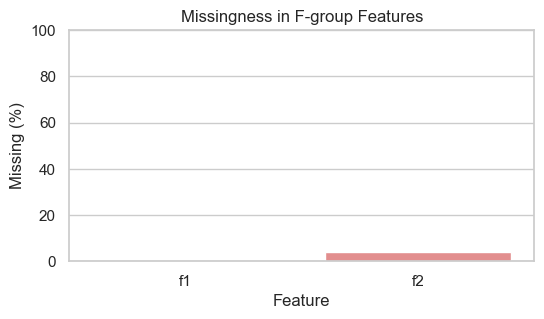

In [73]:
missing_counts = df[f_features].isna().sum()
missing_pct = (missing_counts / len(df) * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing (%)': missing_pct
})
display(missing_summary)

plt.figure(figsize=(6,3))
sns.barplot(x=missing_pct.index, y=missing_pct.values, color='lightcoral')
plt.title("Missingness in F-group Features")
plt.xlabel("Feature")
plt.ylabel("Missing (%)")
plt.ylim(0,100)
plt.show()

### F-group Features: `f1` and `f2`

The F-group features show clear differences in both category balance and completeness.

- **f1:** Contains only two categories and is strongly imbalanced.  
  The majority category makes up almost three-quarters of the dataset, with the minority one forming the rest.  
  The variable is simple but could still have predictive value if the minority class relates to re-offending.

- **f2:** Includes several possible categories but is highly skewed toward a single one.  
  Most records take the same value, while the remaining levels appear rarely.  
  This variable also has around **4 % missing data**, which can easily be handled later with imputation.

Overall, the F-group presents limited variability.  
`f1` is largely binary and complete, while `f2` is more diverse but partially missing.


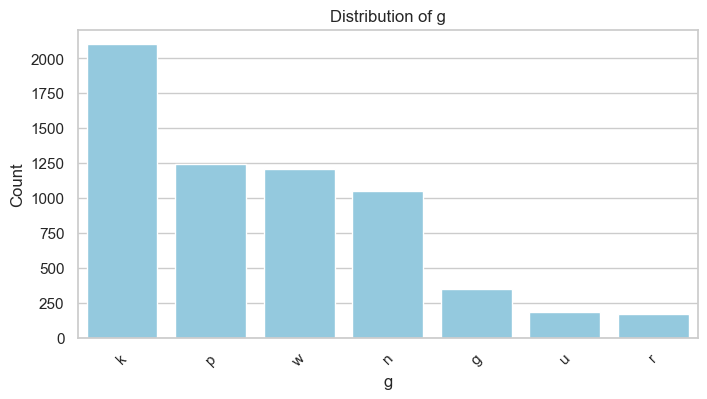

In [74]:
plt.figure(figsize=(8,4))
sns.countplot(x='g', data=df, order=df['g'].value_counts().index, color='skyblue')
plt.title("Distribution of g")
plt.xlabel("g")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [75]:
missing_count = df['g'].isna().sum()
missing_pct = (missing_count / len(df) * 100).round(2)

print(f"Feature g – Missing values: {missing_count}  ({missing_pct}%)")

Feature g – Missing values: 54166  (89.59%)


### Feature `g`

Feature `g` shows multiple categories but also contains a high level of missing values.  
Among the observed data, the category `k` appears most frequently, followed by `p`, `w`, and `n`.  
A few categories (`g`, `u`, and `t`) occur much less often, showing a long-tail distribution.  

Overall, the feature covers a reasonable variety of categories,  
but its usefulness is limited by its **high missing rate (over 80 %)**.  
It will be kept temporarily for exploration but may be excluded or imputed in Pass 3.

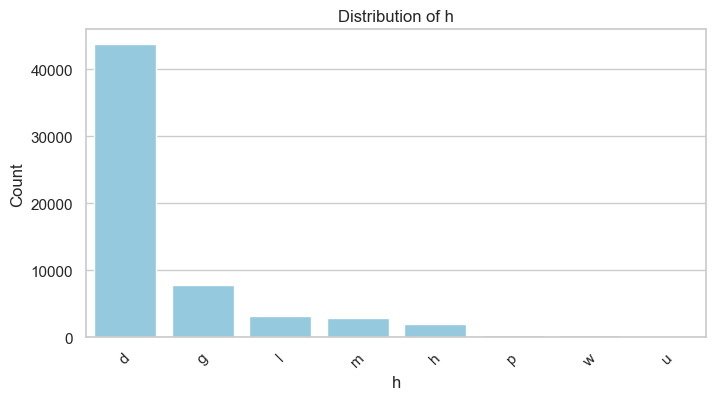

In [76]:
plt.figure(figsize=(8,4))
sns.countplot(x='h', data=df, order=df['h'].value_counts().index, color='skyblue')
plt.title("Distribution of h")
plt.xlabel("h")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [77]:
missing_count = df['h'].isna().sum()
missing_pct = (missing_count / len(df) * 100).round(2)

print(f"Feature h – Missing values: {missing_count}  ({missing_pct}%)")

Feature h – Missing values: 0  (0.0%)


### Feature `h`

Feature `h` is highly imbalanced.  
One category (`d`) dominates almost the entire distribution, while all other levels appear rarely.  
This kind of skewness suggests that the feature may not provide much differentiation power on its own,  
though it could still have some interaction effects with other attributes.

There are also some missing entries, but the proportion is relatively small compared to variables like `g` or `d4`.  
Given the strong dominance of a single category, `h` will likely have limited influence in predictive modelling.


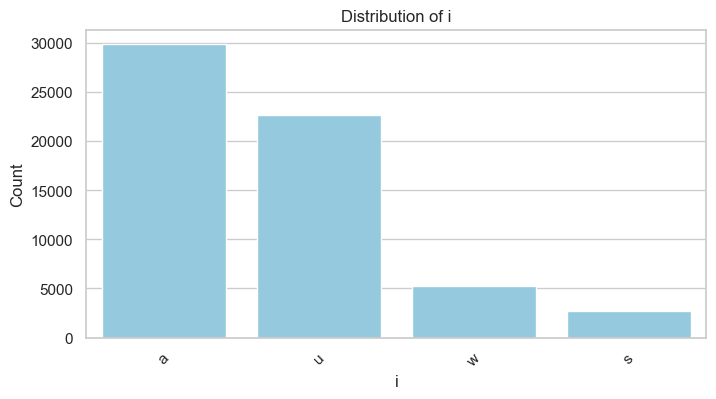

In [78]:
plt.figure(figsize=(8,4))
sns.countplot(x='i', data=df, order=df['i'].value_counts().index, color='skyblue')
plt.title("Distribution of i")
plt.xlabel("i")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [79]:
missing_count = df['i'].isna().sum()
missing_pct = (missing_count / len(df) * 100).round(2)

print(f"Feature i – Missing values: {missing_count} ({missing_pct}%)")

Feature i – Missing values: 0 (0.0%)


### Feature `i`

Feature `i` shows a moderately balanced distribution.  
Two categories (`a` and `u`) dominate the dataset but together still leave room  
for smaller classes (`w` and `s`) that appear in noticeable amounts.  
This pattern indicates some diversity and a potential to explain variation in the target variable.

No missing values, meaning this feature is reliable and ready for deeper analysis in Pass 3.  
Overall, `i` appears to be one of the most complete and informative categorical variables.


### Target Variable – `tgt`

The target variable represents whether an individual **re-offended** within 12 months of release.  
It is binary-valued:
- `y` → Re-offended  
- `n` → Did not re-offend

Understanding its distribution helps confirm whether the dataset is balanced enough for modelling.

,Count,Percentage (%)
tgt,,
y,33542,55.48
n,26916,44.52


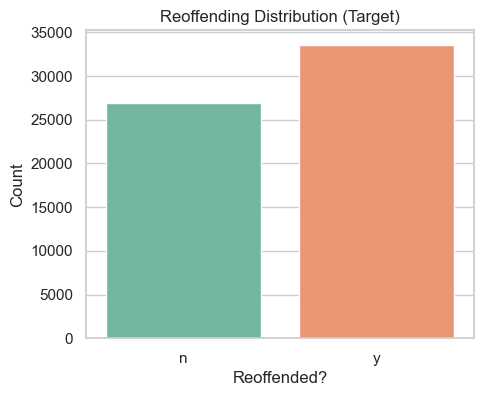

In [80]:
# target distribution
tgt_counts = df['tgt'].value_counts()
tgt_pct = (tgt_counts / len(df) * 100).round(2)
tgt_summary = pd.DataFrame({'Count': tgt_counts, 'Percentage (%)': tgt_pct})
display(tgt_summary)

# visualise
plt.figure(figsize=(5,4))
sns.countplot(x='tgt', hue='tgt', data=df, palette='Set2', legend=False)
plt.title("Reoffending Distribution (Target)")
plt.xlabel("Reoffended?")
plt.ylabel("Count")
plt.show()

The target is **reasonably balanced** between the two classes and no missing values are present.  
both “re-offended” (`y`) and “did not re-offend” (`n`) have similar proportions.  
A balanced target means classification models will not be biased toward one outcome,  
making this dataset suitable for predictive analysis.

## PASS 2 – Summary

This pass focused on exploring individual feature distributions and identifying data patterns.

- Numeric variables (`a1`, `d1`, `d2`) are right-skewed and contain visible outliers.
- Most categorical features show uneven distributions, with certain dominant categories.
- Some groups (especially D, E, G) have high missingness, while others (A, F, I) are mostly complete.
- The target variable `tgt` is balanced between re-offending and non-reoffending cases.

Overall, the dataset is suitable for predictive analysis, though several features may require  
imputation or dimensionality reduction before modelling.